# **Presentación**


## **Tecnicatura Universitaria en Inteligencia Artificial**
### *Trabajo Práctico Integrador*
### ***Aprendizaje Automatico 1***
---

**Equipo**:
- Ferrucci Constantino
- Giampaoli Fabio

<br>

**Fechas de entrega**:
- 27/10/2023 (segunda entrega hasta item 4)


---

## **Resumen**


Esta es la segunda parte del proyecto de la asignatura Aprendizaje Automatico 1. Puede consultar la parte 1 del mismo en el repositorio de [github](https://github.com/Shannon-21/Aprendizaje_Automatico_1.git), o bien el siguiente [notebook de Google Colab](https://colab.research.google.com/drive/1P32i9TmMZgLiKAblI0vKwltg7GMwnqvw?usp=sharing). En el se han realizado algunos cambios con respecto a la primera entrega, particualmente se han extraido los datasets de interes en forma de archivo csv, y profundizado el analisis de residuos de los modelos.\
<br>

La primera parte consiste en la limpieza del dataset ofrecido y obtencion de predicciones y metricas de las mismas sobre la cantidad de lluvia en las ciudades de Australia elegidas para el dia posterior al ingresado.\
<br>

El dataset elegido consiste de variables meteorologicas de Australia en determinado periodo de tiempo que seran de interes para la predicion de la presencia de lluvia en algun dia con ciertas caracteristicas mediante modelos estudiados en el cursado de la materia.\
<br>

En esta etapa del trabajo practico, es de principal interes el analisis y tratamiento del conjunto de datos para conocer el contexto sobre el cual vamos a desarrollarnos y entender como las variables explicativas afectan a nuestra variable de interes: 'RainTomorrow', que es una varible binaria. Luego realizar predicciones utilizando modelos de regresion logistica con diferentes caracteristicas, y comparar cual tiene mejor comportameinto a la hora de predecir la presencia de lluvia para el dia siguiente dada ciertas condiciones del dia previo.\
<br>

# **Entorno**

Me gustaria meter aca directamente el dasaset preprocesado por la parte una del tp (hacer un csv del limpio y cargarlo directo aca). Pero tambien cargar distintas variantes del mismo, ya que la interpretacion del mismo puede diferir al tener todas variable snumiercas estandar (no saber a que ciudad se corresponde un numero, por ejemplo)

Yo cargaria el limpio final, y otro no estandarizado ni codificado ni reducido en clases, pero si imputado.

Este segundo mas con el fin de comparaciones de si las logistas van mejor con o sin codificaciones, y demas.

### Librerias

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score



### Datos

In [2]:
df_denormalized = pd.read_csv('weatherAUS_desnormalized_cleaned.csv', usecols=lambda x: x if x != 'Unnamed: 0' else None)
df = pd.read_csv('weatherAUS_cleaned.csv', usecols=lambda x: x if x != 'Unnamed: 0' else None)

display(df_denormalized.head(5))

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Month,Season,lat,lon
0,0.426354,14.795156,24.925108,3.270007,5.586685,7.000102,0.371301,48.383105,0.351413,0.358342,...,7.241044,18.752999,22.639241,1.0,1.0,2.673692,0.083691,0.250254,-33.853302,151.269564
1,0.426354,14.848012,24.550043,2.676765,5.236419,7.727233,0.289469,47.439317,0.353460,0.278336,...,6.907489,18.998930,23.178137,1.0,1.0,2.710802,0.083691,0.250254,-33.853302,151.269564
2,0.426354,14.896979,24.333995,2.713843,5.111324,7.027033,0.377059,47.898103,0.299340,0.278336,...,7.241044,19.158061,22.929416,1.0,1.0,3.465384,0.083691,0.250254,-33.853302,151.269564
3,0.426354,14.932345,24.437016,3.467755,5.086305,7.000102,0.371301,49.956084,0.377611,0.278336,...,7.241044,18.854265,22.639241,1.0,1.0,7.089852,0.083691,0.250254,-33.853302,151.269564
4,0.426354,14.927856,24.186741,7.089003,5.461590,7.000102,0.377059,48.029184,0.377611,0.279339,...,7.241044,19.013396,23.274862,1.0,1.0,2.401547,0.083691,0.250254,-33.853302,151.269564


# **Analisis Descriptivo**

Si bien esto ya estaba hecho, me gustaria enfocarlo ahora un poco mas en balances de clases, estudiar el comportamiento de presencia de lluvia con respecto a las otras variables, etc.

### Analisis

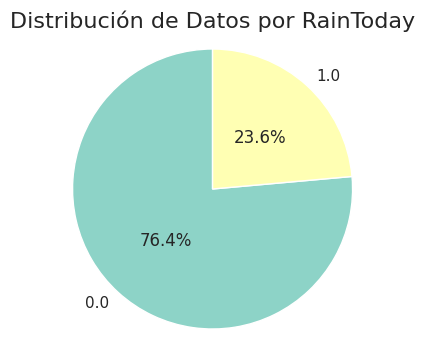

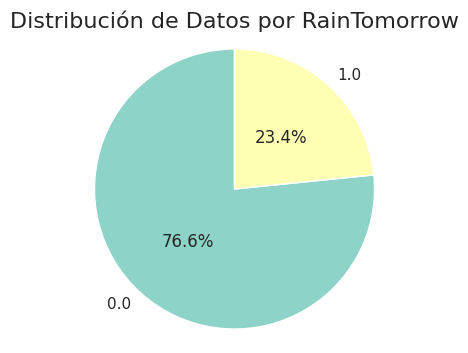

In [3]:
def graficar_proporcion_datos(df, column):
    value_counts = df[column].value_counts()

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(5, 4))

    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors=sns.color_palette('Set3'))

    plt.title(f'Distribución de Datos por {column}', fontsize=16)
    plt.axis('equal')

    plt.show()

graficar_proporcion_datos(df_denormalized, 'RainToday')
graficar_proporcion_datos(df_denormalized, 'RainTomorrow')

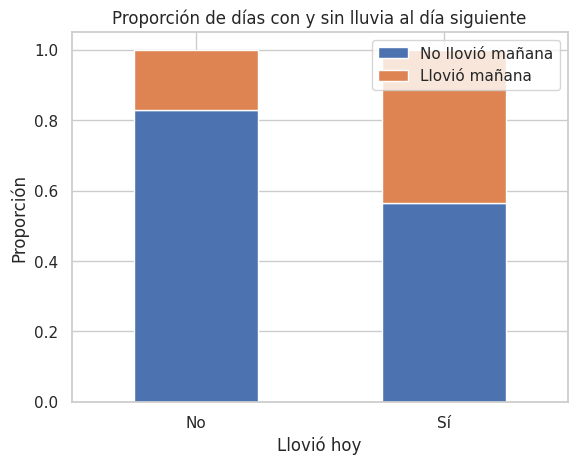

In [4]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_denormalized['RainToday'], df_denormalized['RainTomorrow'])

# Calcular las proporciones
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crear el gráfico de barras
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de días con y sin lluvia al día siguiente')
plt.xlabel('Llovió hoy')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.legend(['No llovió mañana', 'Llovió mañana'])

plt.show()

In [5]:
def create_plots(df, explanatory_var, binary_var):
    fig, axs = plt.subplots(3, 1, figsize=(6,6))

    sns.stripplot(x=explanatory_var, y=[""]*len(df), hue=binary_var, data=df, jitter=True, ax=axs[0])
    axs[0].set_title('Distribución de ' + explanatory_var + ' con respecto a ' + binary_var)
    axs[0].legend('')
    axs[0].set_xlabel("")

    sns.boxplot(y=binary_var, x=explanatory_var, data=df, orient='h', ax=axs[1])
    axs[1].legend('')
    axs[1].set_xlabel("")

    sns.kdeplot(data=df, x=explanatory_var, hue=binary_var, fill=True, ax=axs[2])
    axs[2].set_xlabel(explanatory_var)
    axs[2].legend('')

    plt.tight_layout()
    plt.show()

# Crear los widgets
explanatory_var_widget = widgets.Dropdown(
    options=[col for col in df_denormalized.columns if col not in ['RainToday', 'RainTomorrow', 'Location', 'lat', 'lon', 'Month', 'Season']],
    value='Sunshine',  # Valor predeterminado
    description='Explicativa:',
)

binary_var_widget = widgets.Dropdown(
    options=['RainToday', 'RainTomorrow'],
    value='RainTomorrow',  # Valor predeterminado
    description='Binaria:',
)

# Usar interact para crear la interactividad
interact(create_plots, df=widgets.fixed(df_denormalized), explanatory_var=explanatory_var_widget, binary_var=binary_var_widget)

interactive(children=(Dropdown(description='Explicativa:', index=4, options=('MinTemp', 'MaxTemp', 'Rainfall',…

<function __main__.create_plots(df, explanatory_var, binary_var)>

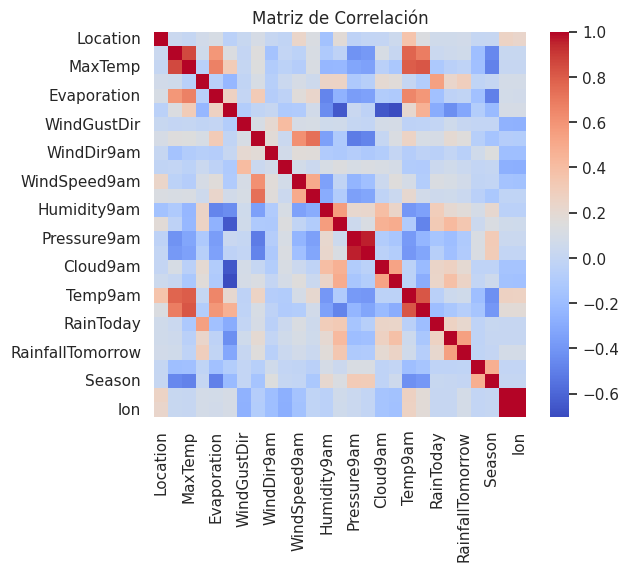

In [6]:
# Calcular la matriz de correlación
corr_matrix = df_denormalized.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()


# **Procesamiento**

Si nos encontramos desbalances, o transformaciones que resultan ventajosas para la clasificacion, podemos agregarlo aca

In [7]:
def base_model_regressor(df):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(columns=['RainTomorrow'], axis=1)
    y = df['RainTomorrow']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Hacer predicciones en el conjunto de prueba
    y_pred = X_test['RainfallTomorrow'].apply(lambda x: 1 if x > 0.1 else 0)
    y_train_pred = X_train['RainfallTomorrow'].apply(lambda x: 1 if x > 0.1 else 0)

    # Calcular las métricas de clasificación
    metrics = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)],
        'Test': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
    }).set_index('Metric')

    return metrics



# Llamada a la función
base_model_regressor(df_denormalized)

,Train,Test
Metric,,
Accuracy,0.234723,0.230921
Precision,0.234723,0.230921
Recall,1.000000,1.000000
F1 Score,0.380204,0.375200


In [8]:
base_model_regressor(df)

,Train,Test
Metric,,
Accuracy,0.818406,0.829605
Precision,1.000000,1.000000
Recall,0.226349,0.262108
F1 Score,0.369143,0.415350


In [9]:

def balance_classes(df, target_var):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(target_var, axis=1)
    y = df[target_var]

    # Crear el objeto SMOTE
    smote = SMOTE(random_state=42)

    # Aplicar SMOTE a los datos
    X_res, y_res = smote.fit_resample(X, y)

    # Devolver el DataFrame balanceado
    return pd.concat([X_res, y_res], axis=1)

# Llamada a la función
df_balanced = balance_classes(df_denormalized, 'RainTomorrow')

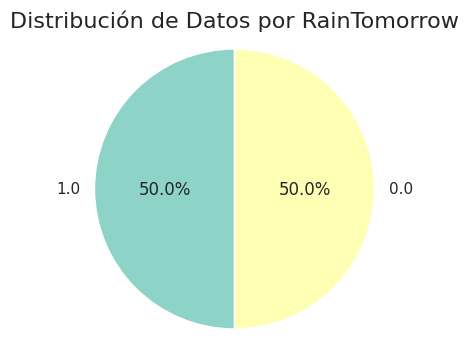

,Train,Test
Metric,,
Accuracy,0.498121,0.507514
Precision,0.498121,0.507514
Recall,1.000000,1.000000
F1 Score,0.664994,0.673312


In [10]:
graficar_proporcion_datos(df_balanced, 'RainTomorrow')
base_model_regressor(df_balanced)

In [11]:
df_balanced_normalized = balance_classes(df, 'RainTomorrow')
base_model_regressor(df_balanced_normalized)

,Train,Test
Metric,,
Accuracy,0.611714,0.601116
Precision,1.000000,1.000000
Recall,0.220498,0.214044
F1 Score,0.361325,0.352613


In [12]:
def get_correlation_with_variable(df, column): # para obtener correlaciones con la variable objetivo
  correlation_matrix = df.corrwith(df[column])
  correlation_matrix = correlation_matrix.to_frame(name='correlation')
  correlation_matrix = correlation_matrix.abs()
  sorted_correlation_matrix = correlation_matrix.sort_values(by='correlation', ascending=False)

  return sorted_correlation_matrix

def get_important_variables(df, umbral): # filtrar aquellas variables que superen un umbral de correlacion minima
  df_copy = df.copy()
  df_copy = df_copy[df_copy['correlation'] > umbral]

  variables = df_copy.index

  return list(reversed(variables))


correlation_with_raintomorrow = get_correlation_with_variable(df_denormalized, 'RainTomorrow')
variables_most_important = get_important_variables(correlation_with_raintomorrow, 0.4)

print(variables_most_important)
tino = df_denormalized[variables_most_important]
base_model_regressor(tino)


['Humidity3pm', 'Sunshine', 'RainfallTomorrow', 'RainTomorrow']


,Train,Test
Metric,,
Accuracy,0.234723,0.230921
Precision,0.234723,0.230921
Recall,1.000000,1.000000
F1 Score,0.380204,0.375200


Como el modelo es tonto, es dificil comparar si hace mejores predicciones con los balneces o no para datos normalizados o no. Asi que vamos a probar otro modelo mas avanzado para definirlo

In [48]:


def base_logistic_regressor(df, weights=None):
    # Separar las variables explicativas y la variable objetivo
    X = df.drop(columns=['RainTomorrow'], axis=1)
    y = df['RainTomorrow']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression(class_weight=weights, max_iter=10000)
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Calcular las métricas de clasificación
    metrics = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)],
        'Test': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
    }).set_index('Metric')

    # display(metrics)

    return y_test, y_pred_proba

In [53]:
def roc_curve(obs, probs):

    # Trazar la curva ROC
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')

    fpr, tpr, _ = roc_curve(obs, probs)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()


Bueno no se que le pasa a colab que me cierra el entorno, pero aca estoy intetando hacer un unico grafico de curvas roc con las cuatro curvas de las diferente metricas del modelo base con diferentes dataframe para ver graficamente con que dataframe el modelo da mejores metricas.

In [ ]:
obs, probs = base_logistic_regressor(df_balanced_normalized)
roc_curve(obs, probs)

# base_logistic_regressor(df_balanced)
# base_logistic_regressor(df)
# base_logistic_regressor(df, {0:1, 1:3})

Y al toque roque, vemos que la regresion logistica con el dataset balancedo no estandarizado con oversampling la rompe

# **Predecciones**

Cuando consideremos que ya el dataset esta en su mejor forma, definimos y jugamos con los modelos.

Aqui vamos a probar parametros del modelo y hacer grefi1uitos de interpretar el modelo.

### Modelos

Aqui nada, jugando con los paremetros, y llegamos a un modelo perfecto.

In [24]:
X = df_balanced.drop(columns=['RainTomorrow'], axis=1)
y = df_balanced['RainTomorrow']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# probando hiperparametos
# model = LogisticRegression(max_iter=1000, penalty='l1', solver='lbfgs')
# model = LogisticRegression(max_iter=100, penalty='l1', solver='lbfgs')
model = LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')
# model = LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg')
# model = LogisticRegression(max_iter=100, penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calcular las métricas de clasificación
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)],
    'Test': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
}).set_index('Metric')

display(metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


,Train,Test
Metric,,
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1 Score,1.0,1.0


### Interpretaciones

Aca vamos a tener que meter toda la parte de explicabilidad para ver las poderaciones y cpmportamiento de los modelos a la hora de predecir y entrenar

# **Conclusiones**

Concluciones de mejores predicciones y los modelos